# Background and motivation

Hi everyone. I think that _every_ student should have some ability to write code. In our digital world, being fluent in some programming language is almost as import as your ability to read and write the English language. Sure, you can survive _without_ it ... but your are so much more valuable as a scientist and employee _with_ it. Acorrding to some research, jobs with coding requirements pay about \\$22,000 more (on average) than jobs that don't require coding. Be aware that this is correlation, not causation. Is a chemist that knows how to code going to make an extra \\$22,000 per year compared to a chemist that doesn't know how to code? That seems unlikely. However, I am confident that, with all other variables being equal, a ~~chemist~~ scientist that can code will make more money and have more job opportunities than a ~~chemist~~ scientist that cannot code.

So, am I expecting this one excercise to make you into a marketable coder? Absolutely not. I know that coding is a skill and it takes time to develop that skill. But you need some place to start...

Here are the things that I want you to take home from this exercise:
* See coding as a tool to help you simulate complex numerical problems
* See coding as an extension or alternative to Excel
* See how easy it is to produce consistent, publication-quality figures
* Learn how and why the lab procedure that I give you has the numbers that I give you
* Understand what goes into a titration
* Make connections between the theories and equations that we discuss in class and the real life phenomenon and observables that you see in lab
* Understand how to analyze the data

To that end, I am introducing you the the Python programming language - arguably the hottest, most in-demand, and easiest language to learn. And I'm doing that with something called Jupyter. Jupyter is a web-based programming environment that was designed to: run in a web browser; combine code, documentation, comments, and graphics; focus on the programming languages **JU**lia, **PYT**hon, and **R**; and emulate the look and feel of software like Mathematica.

Instagram uses [Python](https://www.zdnet.com/article/programming-languages-how-instagrams-taming-a-multimillion-line-python-monster/) and Netflix uses [Jupyter](https://medium.com/netflix-techblog/notebook-innovation-591ee3221233).

# Use the book!

All of the theory in this notebook comes from the 9th edition of our textbook. Specifically,
* All of the equations that you need to simulate a titration are on page 256
* Simulating a titration curve numerically with a spreadsheet is on page 255
* The equations, methods, and example data to calculate the 1st and 2nd derivative are on page 244-245

You will have to do all of this stuff in lab!

# It's a little weird ...

In a normal titration, we pick a specific volume and calculate the pH. Or we add a specific volume to the solution and measure the pH. In both cases, the volume is the independent variable and the pH is the dependent variable. That works great when you're actually doing a titration or trying to calculate the pH at a specific point.

If you want to simulate an entire pH curve, it actually becomes easier to create a list of pH values (e.g. 0.00, 0.10, 0.20, ... 13.80, 13.90, 14.00) and then calculate the volume that corresponds to that particular pH. I know. Weird, right? See the middle of page 255 for the explanation. There is a derivation of this, but pH is the **input** and $V_b=\frac{\phi C_aV_a}{C_b}$ is the **output**. C and V represent the concentration and volume of the acid (a) and base (b).

Ok, great. What is ${\phi}$? Well, that is the fraction of completion in our titration. Depending on strong _versus_ weak and monoprotic _versus_ polyprotic, the form of ${\phi}$ can get pretty complicated. Here it is:

$$\phi=\frac{\alpha_{H_2A^-}+\alpha_{HA^{2-}}+\alpha_{A^{3-}}-\frac{[H^+]-[OH^-]}{C_a}}{1+\frac{[H^+]-[OH^-]}{C_a}}$$

$\alpha$ represents the fraction of dissociation for a particular species. We have:

$$\alpha_{H_2A^-}=\frac{[H^+]^2K_1}{[H^+]^3+[H^+]^2K_1+[H^+]K_1K_2+K_1K_2K_3}$$
$$\alpha_{HA^{2-}}=\frac{[H^+]K_1K_2}{[H^+]^3+[H^+]^2K_1+[H^+]K_1K_2+K_1K_2K_3}$$
$$\alpha_{A^{3-}}=\frac{K_1K_2K_3}{[H^+]^3+[H^+]^2K_1+[H^+]K_1K_2+K_1K_2K_3}$$

Sure, those equations are big and ugly, but they are mathematically simple. Better yet, if you start with the pH as your input, then you know what all of the variables are and it becomes easy (though, maybe, tedious) to solve for the volume.

# What to do...

Well, let's start with my assumptions and expectations.
* I assume that **none** of you have any programming experience at all
* I assume that **none** of you have any Jupyter experience at all
* I expect that will execute the code in these cells to learn about the variables that are important for titrations
* look for cells labeled "Task \[NUMBER\], do what they say, and answer the questions

# Task 0
This is a _markdown_ cell. It contains text, equations, links, instructions, etc. You need to read these cells. If you double click them, you can edit the text inside. To _execute_ the cell and get out of the edit mode, use **SHIFT+RETURN**.

The cell below this one is a _code_ cell and it contains some Python code. Run it (remember: SHIFT+ENTER) to see what happens.

After you have run the cell, modify it so that it says "Hello, \[YOUR NAME\]!" and run it again.

In [1]:
print("Hello, World!")

Hello, World!


# Part 1: Titration of a monoprotic weak acid (MES) with a strong base (KOH)

In [9]:
# this cell is important for all of the background stuff
# there will be no output generated when you run this cell and that's ok!
# numpy is a library that allows us to deal with math and strings of numbers efficiently
# matplotlib is a library to help us make nice pictures

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# this will make all of our plots look nice and consistent
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

mpl.rc('font', **font)

/Users/jlmsch1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less


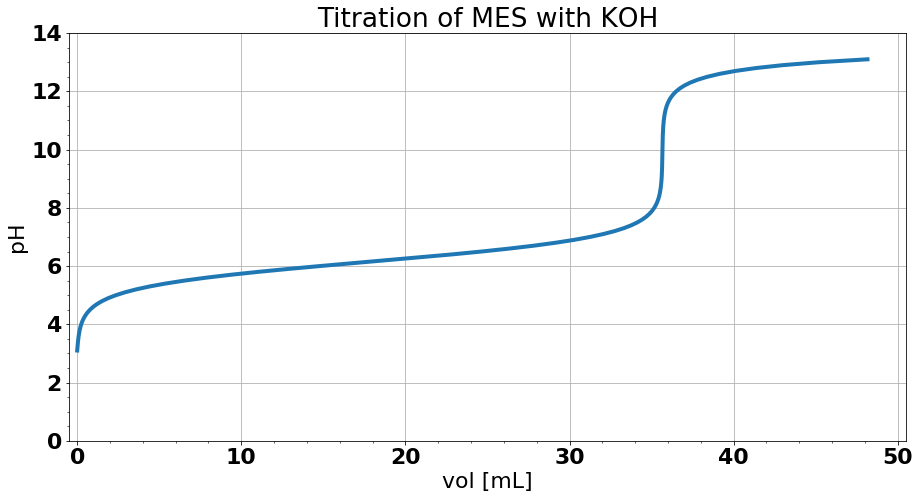

In [10]:
# remember earlier when i said that we're going to calculate the volume from a given pH value?
# well, this is that part. i'm making a list of pH values: there are 141 values that range from
# 0.00 - 14.00
# i'm also creating an empty place to put the volumes
mono_array_size = 141
mono_pH_array = np.linspace(0.00, 14.00, mono_array_size)
mono_vol_array = np.zeros(mono_array_size)

# here is where i'm defining all of the constants that are relavent
# all of these things should be self-explanatory
mono_conc_base = 0.7692
mono_conc_acid = 0.5486
mono_vol_acid = 50.00
mono_pKa = 6.15
mono_Ka = 10**-mono_pKa
Kw = 1.01e-14

# you know what a mathematical function is. this is a programming function. if you supply a pH value
# to this function, it will spit out a volume of added base.
def mono_calculate_volume(pH):
    H_plus = 10**-pH
    OH_minus = Kw / H_plus
    alpha_A_minus = mono_Ka / (H_plus + mono_Ka)
    phi = (alpha_A_minus - (H_plus - OH_minus)) / (1 + (H_plus - OH_minus) / mono_conc_base)
    vol_base = phi * mono_conc_acid * mono_vol_acid / mono_conc_base
    vol_base[vol_base > 50.] = np.nan
    vol_base[vol_base < 0.] = np.nan
    return vol_base

# this is the magic part where we actually calculate the volumes for each of the 141 pH values
mono_vol_array = mono_calculate_volume(mono_pH_array)


# make a pretty picture
plt.figure(figsize=(15,7.5))
plt.plot(mono_vol_array, mono_pH_array, linewidth=4)
plt.xlabel('vol [mL]')
plt.ylabel('pH')
plt.grid(True)
plt.title('Titration of MES with KOH')
plt.minorticks_on()

# YOU SHOULD CHANGE THESE NUMBERS TO "ZOOM IN" TO YOUR PEAK (XMIN, XMAX, YMIN, YMAX)
plt.axis([-0.50, 50.50, 0.00, 14.00]) 

plt.show()

# Task 1

Ok. That plot is beautiful! It looks like a perfect titration curve, right? Go back to the previous cell. See where it says "You should change these numbers"? Well, change those numbers. The original values are \[-0.50, 50.50, 0.00, 14.00\]. Try something like \[34.0, 38.0, 8.0, 12.0\] and re-run that cell (shift+enter). Did the graph change? Can you figure out where the equivalence point is?


Well, I think you could easily see that it is nearly impossible to predict where the equivalence point is simply by looking at the titration curve. Right? Let's try some alternative methods. The first thing we want to do is calculate the 1st derivative and see if that helps us.

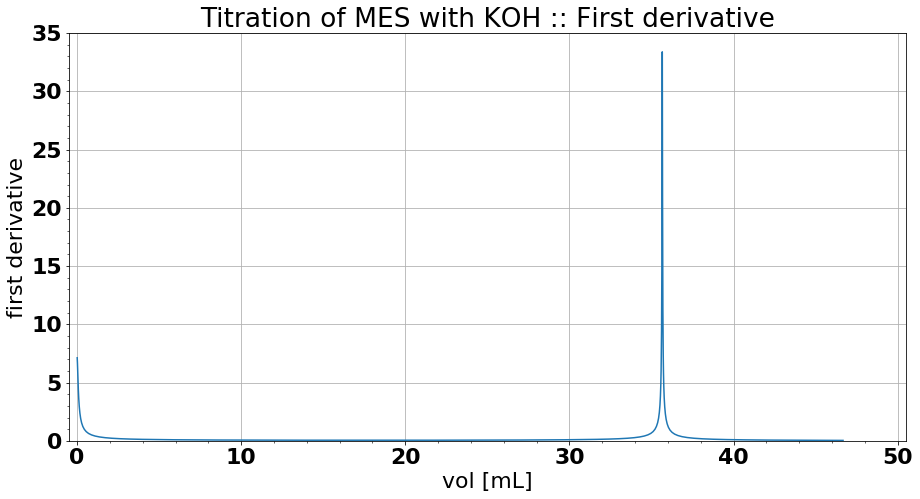

In [11]:
mono_vol_array_1st = np.zeros(mono_array_size)
mono_pH_array_1st = np.zeros(mono_array_size)

# here is the actual first-derivative calculation.
for index in range(0, mono_array_size - 1, 1):
    mono_vol_array_1st[index] = (mono_vol_array[index] + mono_vol_array[index + 1]) / 2
    mono_pH_array_1st[index] = (mono_pH_array[index + 1] - mono_pH_array[index]) / \
    (mono_vol_array[index + 1] - mono_vol_array[index])

plt.figure(figsize=(15,7.5))
plt.plot(mono_vol_array_1st, mono_pH_array_1st)
plt.xlabel('vol [mL]')
plt.ylabel('first derivative')
plt.grid(True)
plt.title('Titration of MES with KOH :: First derivative')
plt.minorticks_on()

# YOU SHOULD CHANGE THESE NUMBERS TO "ZOOM IN" TO YOUR PEAK (XMIN, XMAX, YMIN, YMAX)
plt.axis([-0.50, 50.50, 0.00, 35.00]) 

plt.show()

# Task 2

Similar to Task 1, zoom in so you can try to estimate where the equivalence point occurs. Is this easier or more accurate than looking at the raw titration curve?

Ok. We looked at the raw titration curve and the first derivative. Let's try looking at the second derivative. Maybe that will be more useful.

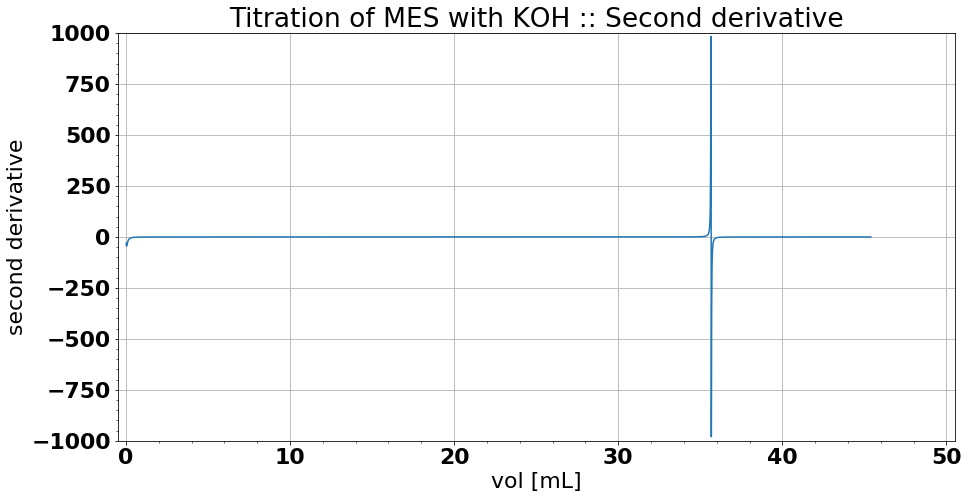

In [12]:
mono_vol_array_2nd = np.zeros(mono_array_size)
mono_pH_array_2nd = np.zeros(mono_array_size)

# here is the actual second-derivative calculation. this is EXACTLY what is shown on
# page 244 of the textbook. this is EXACTLY what you have to do in lab this week!
for index in range(0, mono_array_size - 1, 1):
    mono_vol_array_2nd[index] = (mono_vol_array_1st[index] + mono_vol_array_1st[index + 1]) / 2
    mono_pH_array_2nd[index] = (mono_pH_array_1st[index + 1] - mono_pH_array_1st[index]) / \
    (mono_vol_array_1st[index + 1] - mono_vol_array_1st[index])

# make a pretty picture
plt.figure(figsize=(15,7.5))
plt.plot(mono_vol_array_2nd, mono_pH_array_2nd)
plt.xlabel('vol [mL]')
plt.ylabel('second derivative')
plt.grid(True)
plt.title('Titration of MES with KOH :: Second derivative')
plt.minorticks_on()

# YOU SHOULD CHANGE THESE NUMBERS TO "ZOOM IN" TO YOUR PEAK (XMIN, XMAX, YMIN, YMAX)
plt.axis([-0.50, 50.50, -1000.00, 1000.00]) 

plt.show()

# Task 3

Similar to Tasks 1 and 2, zoom in so you can try to estimate where the equivalence point occurs. Is this easier or more accurate than looking at the raw titration curve or the first derivative?

# Task 4

There are a couple parts to this one. Now that you know how to find the equivalence point, go back to the beginning - the first cell where we calculated the raw titration curve.

* What happens if you change the pKa? Try values of 2.00, 6.00, and 10.00. Make sure that you run all the cells again!
* What happens if you increase or decrease the concentration of KOH? Try 0.5x and 2x the current concentration. Are their practical limitations (how big is your buret?)?
* If you think about changing/shifting/moving the equivalence point, how is changing the pKa different than changing the volumes or concentrations of acid and base?

# Part 2: Titration of a polyprotic weak acid (citric) with a strong base (KOH)

/Users/jlmsch1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less


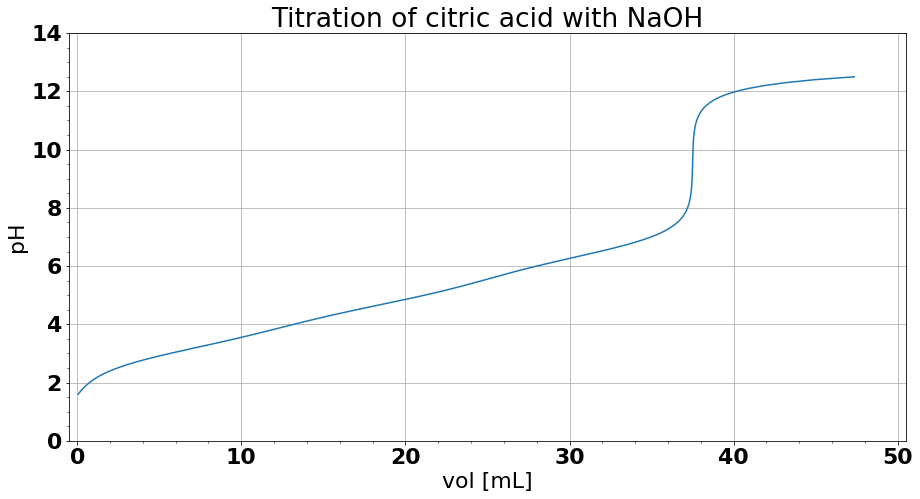

In [13]:
poly_array_size = 141
poly_pH_array = np.linspace(0.00, 14.00, poly_array_size)
poly_vol_array = np.zeros(poly_array_size)

poly_conc_base = 0.16 # concentration of base (KOH; titrant) in molar
poly_conc_acid = 0.0400 # concentration of acid (citric) in molar
poly_vol_acid = 50.00   # volume of acid (citric) in mL

poly_pKa1 = 3.1   # pKa1 of the acid
poly_pKa2 = 4.7   # pKa2 of the acid
poly_pKa3 = 6.4    # pKa3 of the acid
poly_Ka1 = 10**-poly_pKa1      # pKa1 of the acid
poly_Ka2 = 10**-poly_pKa2      # pKa2 of the acid
poly_Ka3 = 10**-poly_pKa3      # pKa3 of the acid
Kw = 1.01e-14           # Kw of water at 25 degrees C

def poly_calculate_volume(pH):
    H_plus = 10**-pH
    OH_minus = Kw / H_plus
    poly_D = ((H_plus**3) + (H_plus**2 * poly_Ka1) + (H_plus * poly_Ka1 * poly_Ka2) + \
              (poly_Ka1 * poly_Ka2 * poly_Ka3))
    alpha_H2A_minus = (H_plus**2 * poly_Ka1) / poly_D
    alpha_HA_2minus = (H_plus * poly_Ka1 * poly_Ka2) / poly_D
    alpha_A_3minus = (poly_Ka1 * poly_Ka2 * poly_Ka3) / poly_D
    phi = (alpha_H2A_minus + 2 * alpha_HA_2minus + 3 * alpha_A_3minus - (H_plus - OH_minus)) / \
    (1 + (H_plus - OH_minus) / poly_conc_base)
    vol_base = phi * poly_conc_acid * poly_vol_acid / poly_conc_base
    vol_base[vol_base > 50.] = np.nan
    vol_base[vol_base < 0.] = np.nan
    return vol_base
    
poly_vol_array = poly_calculate_volume(poly_pH_array)

plt.figure(figsize=(15,7.5))
plt.plot(poly_vol_array, poly_pH_array)
plt.xlabel('vol [mL]')
plt.ylabel('pH')
plt.grid(True)
plt.title('Titration of citric acid with NaOH')
plt.minorticks_on()

# YOU SHOULD CHANGE THESE NUMBERS TO "ZOOM IN" TO YOUR PEAKS (XMIN, XMAX, YMIN, YMAX)
plt.axis([-0.50, 50.50, 0.00, 14.00])

plt.show()

# Task 5

Did you get a nice titration curve in the last cell? How many equivalence points do you expect to see for a triprotic acid? How many do you actually see? Hmm. What do you think is going on here? Even though you can't see the first two equivalence points, can you predict where they should occurr?

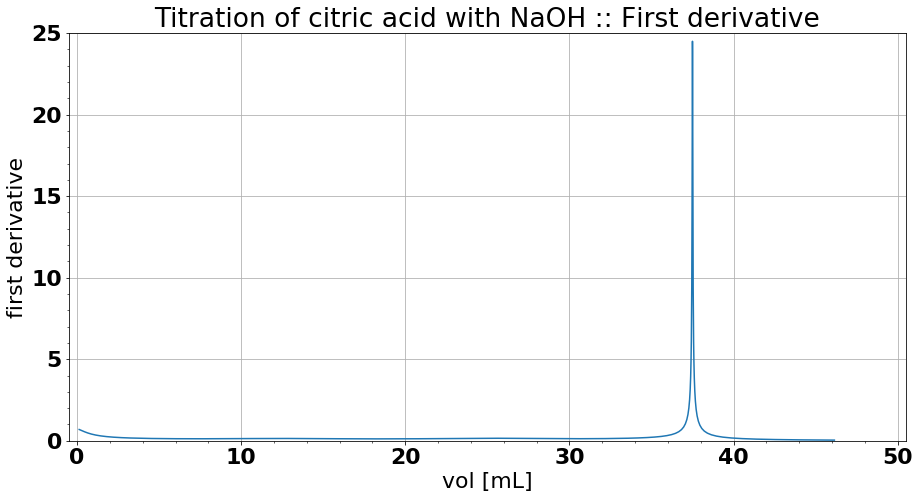

In [14]:
poly_vol_array_1st = np.zeros(poly_array_size)
poly_pH_array_1st = np.zeros(poly_array_size)

# here is where we actually calculate the first derivative. this is EXACTLY what is shown on
# page 244 of the textbook. this is EXACTLY what you have to do in lab next week!
for index in range(0, poly_array_size - 1, 1):
    poly_vol_array_1st[index] = (poly_vol_array[index] + poly_vol_array[index + 1]) / 2
    poly_pH_array_1st[index] = (poly_pH_array[index + 1] - poly_pH_array[index]) / (poly_vol_array[index + 1] - poly_vol_array[index])

# make a pretty picture
plt.figure(figsize=(15,7.5))
plt.plot(poly_vol_array_1st, poly_pH_array_1st)
plt.xlabel('vol [mL]')
plt.ylabel('first derivative')
plt.grid(True)
plt.title('Titration of citric acid with NaOH :: First derivative')
plt.minorticks_on()

# YOU SHOULD CHANGE THESE NUMBERS TO "ZOOM IN" TO YOUR PEAKS (XMIN, XMAX, YMIN, YMAX)
plt.axis([-0.50, 50.50, 0.00, 25.00]) 

plt.show()

# Task 6

* Change YMAX to 1 and re-execute the cell. Can you see the two missing equivalence points? What do you notice about $\Delta$V between equivalence points?
* Change YMAX back to 25 and "zoom in" to see if you can tell where the equivalence point occurrs (i.e. what volume?).

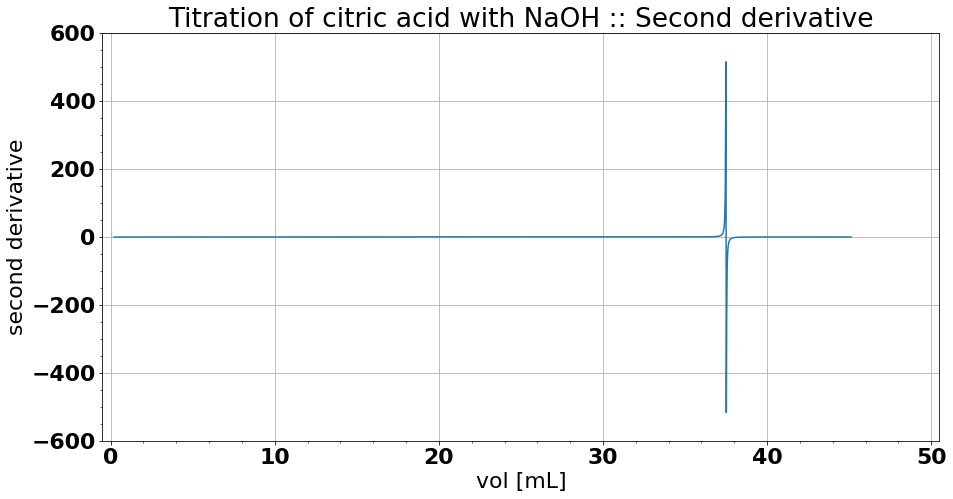

In [15]:
poly_vol_array_2nd = np.zeros(poly_array_size)
poly_pH_array_2nd = np.zeros(poly_array_size)

# here is where we actually calculate the first derivative. this is EXACTLY what is shown on
# page 244 of the textbook. this is EXACTLY what you have to do in lab this week!
for index in range(0, poly_array_size - 1, 1):
    poly_vol_array_2nd[index] = (poly_vol_array_1st[index] + poly_vol_array_1st[index + 1]) / 2
    poly_pH_array_2nd[index] = (poly_pH_array_1st[index + 1] - poly_pH_array_1st[index]) / (poly_vol_array_1st[index + 1] \
                                                                                            - poly_vol_array_1st[index])

# make a pretty picture
plt.figure(figsize=(15,7.5))
plt.plot(poly_vol_array_2nd, poly_pH_array_2nd)
plt.xlabel('vol [mL]')
plt.ylabel('second derivative')
plt.grid(True)
plt.title('Titration of citric acid with NaOH :: Second derivative')
plt.minorticks_on()

# YOU SHOULD CHANGE THESE NUMBERS TO "ZOOM IN" TO YOUR PEAK (XMIN, XMAX, YMIN, YMAX)
plt.axis([-0.50, 50.50, -6.00e+2, 6.00e+2]) 

plt.show()

# Task 7

* If you zoom in, can you see all of the equivalence points?